# Describing Distributions (CORE)
---

Author: Jackson Muehlbauer

Date: 3/5/2023

In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
# load data
path = 'Data/Medical.csv'
df = pd.read_csv(path)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [8]:
df.columns

Index(['State', 'Lat', 'Lng', 'Area', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',
       'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges'],
      dtype='object')

In [23]:
# define histogram function

def dist_hist(col, data = df, mean = True, median = True, std = True, kurtosis = True, kde = True, figsize = (10, 6)):
    """
    col: column name
    data: dataframe with col
    mean: Display mean?
    median: Display median?
    std: Display std?
    kurtosis: Print kurtosis?
    kde = Display std?
    """
    fig,ax = plt.subplots(figsize = figsize)
    sns.histplot(data = data, x = col, stat='probability', kde = kde)
    if mean == True:
        mean = data[col].mean()
        ax.axvline(mean, color = 'r', label = f'Mean: {mean:,.2f}')
    if median == True:
        median = data[col].median()
        ax.axvline(median, color = 'g', label = f'Median: {median:,.2f}')
    if std == True:
        mean = data[col].mean()
        std = data[col].std()
        p1 = mean+std
        n1 = mean-std
        ax.axvline(p1, color = 'k', label = f'+1 std: {p1:,.2f}')
        ax.axvline(n1, color = 'k', label = f'-1 std: {n1:,.2f}')
        ax.axvspan(n1, p1, color = 'yellow', zorder = 0)
    if kurtosis == True:
        kurt = stats.kurtosis(data[col], fisher = False)
        print(f'Kurtosis: {kurt}')
    ax.legend()
    ax.set_title(f'Probability Distribution of {col}')
    return fig, ax

Kurtosis: 3.013147515833447


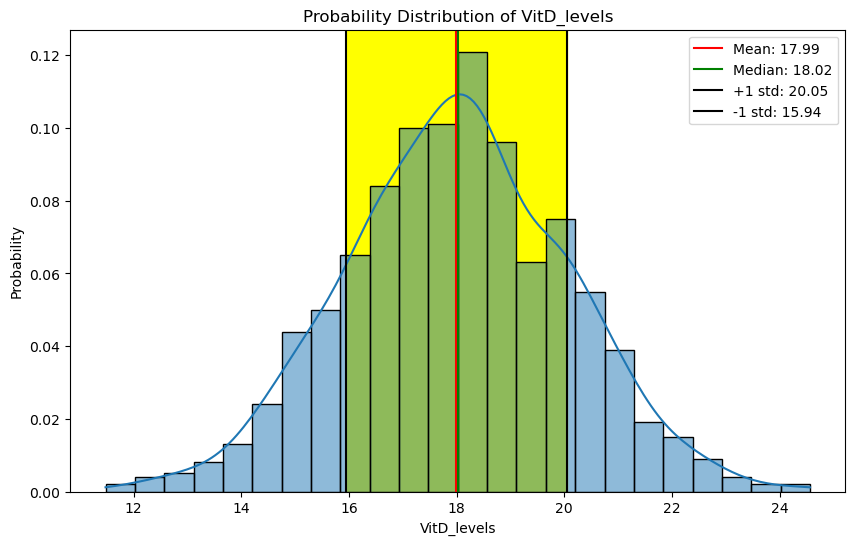

In [20]:
# Vitamin D levels
fig, ax = dist_hist('VitD_levels')

**Distribution Interpretation:**
- Continuous distribution (no gaps)
- Little to no skew (mean and median are almost equivalent)
- Kurtosis ~ 3.0, therefore this data has a Mesokurtic  distribution

Kurtosis: 2.9919958083381206


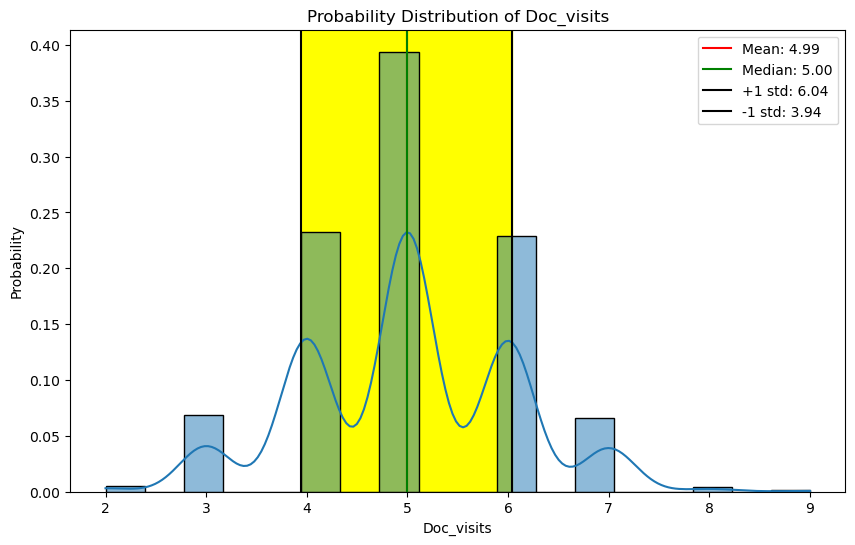

In [21]:
# Doc_visits
fig, ax = dist_hist('Doc_visits')

**Distribution Interpretation:**
- Discrete distribution (presence of gaps)
- Little to no skew (mean and median are almost equivalent)
- Kurtosis ~ 3.0, therefore this data has a Mesokurtic  distribution

Kurtosis: 3.2650077463439384


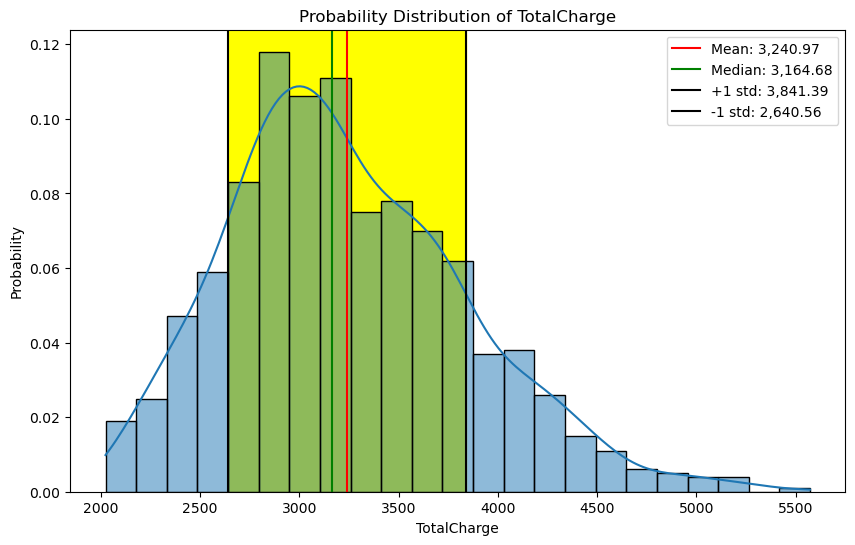

In [22]:
# TotalCharge
fig, ax = dist_hist('TotalCharge')

**Distribution Interpretation:**
- Continuous distribution (no gaps)
- Positive Skew (longer tail on the right-hand side, separation of median and mean)
- Kurtosis > 3, therefore this data is slightly Leptokurtic (data is clusters on the peak)